In [26]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt 
import seaborn as sns

In [27]:
data = pd.read_csv("Customers.csv")

In [28]:
data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [29]:
data.tail()

,CustomerID,CustomerName,Region,SignupDate
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03
199,C0200,Kelly Cross,Asia,2023-06-11


In [30]:
data.shape

(200, 4)

In [31]:
data.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [32]:
data.nunique()

CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64

In [33]:
data['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

In [34]:
data.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [35]:
# Correlation matrix for numerical variables

In [36]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

In [37]:
if not numerical_data.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numerical columns available for correlation matrix.")

No numerical columns available for correlation matrix.


In [38]:
print(data.dtypes)

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object


In [39]:
# Value counts for categorical columns
for col in ['Region']:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("-" * 40)

Value counts for Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
----------------------------------------


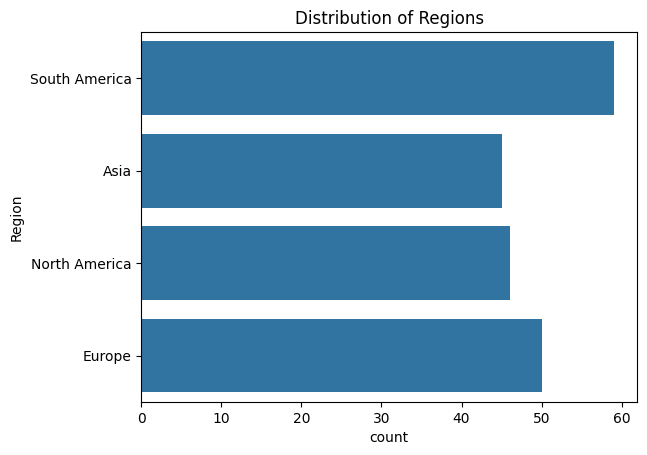

In [40]:
# Visualize distribution of Region
sns.countplot(y=data['Region'])
plt.title("Distribution of Regions")
plt.show()

In [41]:
# Check for duplicate CustomerIDs
duplicates = data['CustomerID'].duplicated().sum()
print(f"Number of duplicate CustomerIDs: {duplicates}")

Number of duplicate CustomerIDs: 0


In [42]:
# Convert SignupDate to datetime
data['SignupDate'] = pd.to_datetime(data['SignupDate'], errors='coerce')

In [43]:
# Check for missing or invalid dates
print(f"Missing SignupDate entries: {data['SignupDate'].isnull().sum()}")

Missing SignupDate entries: 0


In [44]:
# Extract year, month, and day information
data['SignupYear'] = data['SignupDate'].dt.year
data['SignupMonth'] = data['SignupDate'].dt.month
data['SignupWeekday'] = data['SignupDate'].dt.day_name()

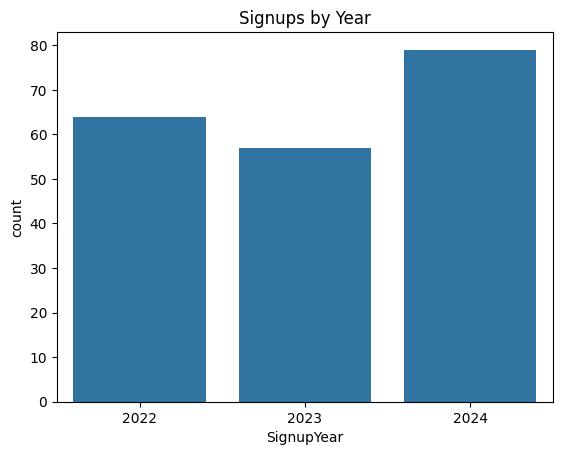

In [45]:
# Visualize trends over time
sns.countplot(x=data['SignupYear'])
plt.title("Signups by Year")
plt.show()


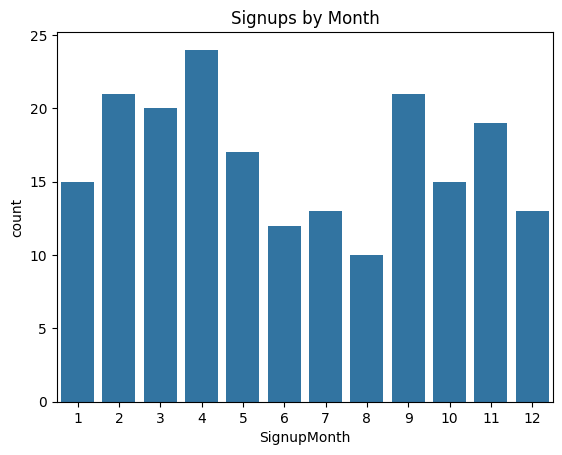

In [46]:
sns.countplot(x=data['SignupMonth'])
plt.title("Signups by Month")
plt.show()

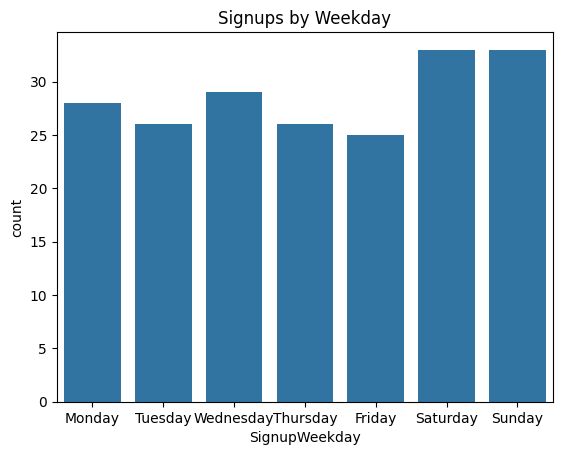

In [47]:
sns.countplot(x=data['SignupWeekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Signups by Weekday")
plt.show()

In [48]:
# Count unique customer names
unique_names = data['CustomerName'].nunique()
print(f"Number of unique customer names: {unique_names}")

Number of unique customer names: 200


In [49]:
# Cross-tabulation of Region and SignupYear
region_signup = pd.crosstab(data['Region'], data['SignupYear'])
print(region_signup)

SignupYear     2022  2023  2024
Region                         
Asia             13    16    16
Europe           16    19    15
North America    10     8    28
South America    25    14    20


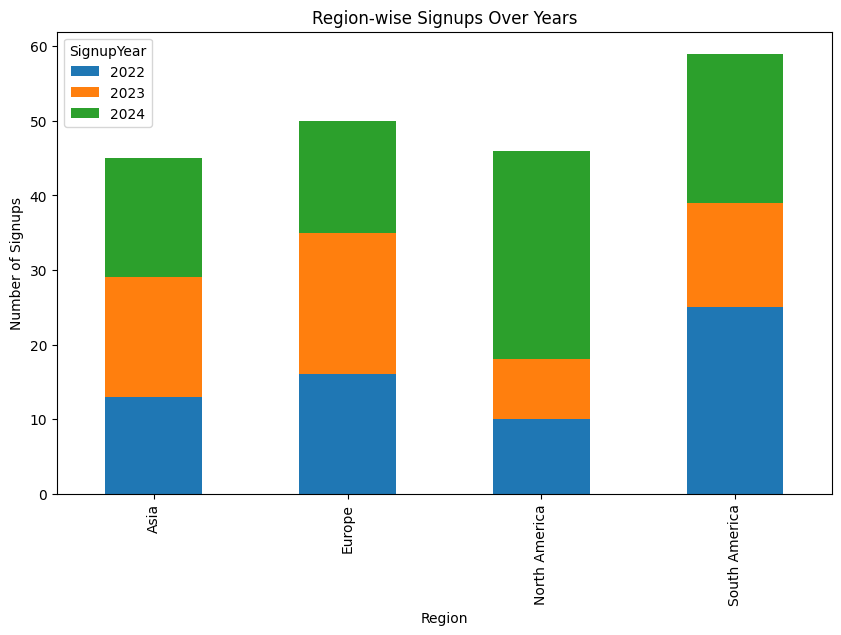

In [50]:
# Visualize the relationship
region_signup.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Region-wise Signups Over Years")
plt.ylabel("Number of Signups")
plt.show()